In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 2: Numerical Integration (or Quadrature) <a class="tocSkip">
    
###  Homework Exercises - Solutions<a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Implement-the-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="Homework---Implement-the-composite-version-of-the-trapezoidal-rule-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Implement the composite version of the trapezoidal rule</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-the-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="Solution---Implement-the-composite-version-of-the-trapezoidal-rule-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Implement the composite version of the trapezoidal rule</a></span></li></ul></li><li><span><a href="#Homework---Implement-Weddle's-rule" data-toc-modified-id="Homework---Implement-Weddle's-rule-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Implement Weddle's rule</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-Weddle's-rule" data-toc-modified-id="Solution---Implement-Weddle's-rule-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Implement Weddle's rule</a></span></li></ul></li><li><span><a href="#Homework---Midpoint-rule-error-[$\star$]" data-toc-modified-id="Homework---Midpoint-rule-error-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Midpoint rule error [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Midpoint-rule-error" data-toc-modified-id="Solution---Midpoint-rule-error-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Midpoint rule error</a></span></li></ul></li><li><span><a href="#Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star$]" data-toc-modified-id="Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Derive Simpson's rule as quadratic fit [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Derive-Simpson's-rule-as-quadratic-fit" data-toc-modified-id="Solution---Derive-Simpson's-rule-as-quadratic-fit-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Derive Simpson's rule as quadratic fit</a></span></li></ul></li><li><span><a href="#Homework---Open-vs-closed-Newton-Cotes-[$\star$]" data-toc-modified-id="Homework---Open-vs-closed-Newton-Cotes-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Open vs closed Newton-Cotes [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Open-vs-closed-Newton-Cotes" data-toc-modified-id="Solution---Open-vs-closed-Newton-Cotes-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Open vs closed Newton-Cotes</a></span></li></ul></li><li><span><a href="#Homework---Implement-adaptive-quadrature-[$\star\star$]" data-toc-modified-id="Homework---Implement-adaptive-quadrature-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Implement adaptive quadrature [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-adaptive-quadrature" data-toc-modified-id="Solution---Implement-adaptive-quadrature-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution - Implement adaptive quadrature</a></span></li></ul></li><li><span><a href="#Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]" data-toc-modified-id="Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature" data-toc-modified-id="Solution---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Solution - Implement a "composite" version of Gauss-Legendre quadrature</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# we're going to be using some SciPy in-built integration routines
import scipy.integrate as si

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Implement the composite version of the trapezoidal rule

In the lecture we implemented the naive version of the trapezoidal rule over multiple subintervals - we noted that this implementation has redundant function evaluations.

Implement a composite version based upon the discussion in the lecture which minimises function evaluations and test it against the function `trapezoidal_rule`.

Think about how you can make the *verification* of your new code against the one from the Lecture as rigorous as possible.

### Solution - Implement the composite version of the trapezoidal rule

The key difference is to replace the maths

$$I_T :=  \sum_{i=0}^{n-1}\,  I_T^{(i)}  = \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i), $$

with

$$I_T := [f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\frac{\Delta x}{2}.$$

For rigorous verification we should at a minimum: (1) check for agreement with a code we trust; (2) check for convergence, and that convergence is consistent with what they theory tells us the convergence rate should be; (3) and we should test on different problems (here function to integrate, as well as different integration limits) and using different numbers of intervals, etc.

In [3]:
# function from the lecture:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule"""
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
             (function(this_bin_start) + function(this_bin_start+interval_size)) / 2.0

    # Return our running total result
    return I_T


# a new function
def trapezoidal_rule2(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule - composite version"""
    interval_size = (b - a)/number_intervals
    assert interval_size > 0
    assert type(number_intervals) == int
    I_T = 0.0
    # Use the composite form of the rule
    # note that with some thought we can minimise the multiplications by 2, as well as by
    # the interval_size:
    I_T += function(a)/2.0
    for i in range(1, number_intervals):
        I_T += function(a + i * interval_size)
    I_T += function(b)/2.0
    # Return our running total result
    return I_T * interval_size

In [4]:
# Now let's test our two simpson rule functions.

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# here we just print the two intergal approximations and compare using the
# "eyeball" norm - ideally you would use something like np.allclose.
print('\nVerificaton check: \n')
interval_sizes = [1, 2, 4, 8, 16, 32, 100, 1000]
for (i, number_intervals) in enumerate(interval_sizes):
    print('{0:.16f}, {1:.16e}'.format(trapezoidal_rule(0, np.pi, f, number_intervals),\
                                      trapezoidal_rule2(0, np.pi, f, number_intervals)))
    
# of course you could use numpy.allclose, and you should also test on other equations, e.g.:

print('\nTest on x^2 with 10 intervals:',np.allclose(  trapezoidal_rule(0., 1., lambda x : x**2, 10),\
                    trapezoidal_rule2(0., 1., lambda x : x**2, 10)) )

print('\nTest on exp with 100 intervals:',np.allclose(  trapezoidal_rule(1., 3., np.exp, 100),\
                    trapezoidal_rule2(1., 3., np.exp, 100)) )


Verificaton check: 

0.0000000000000002, 1.9236706937217898e-16
1.5707963267948968, 1.5707963267948966e+00
1.8961188979370398, 1.8961188979370398e+00
1.9742316019455510, 1.9742316019455508e+00
1.9935703437723391, 1.9935703437723395e+00
1.9983933609701445, 1.9983933609701441e+00
1.9998355038874440, 1.9998355038874436e+00
1.9999983550656619, 1.9999983550656624e+00

Test on x^2 with 10 intervals: True

Test on exp with 100 intervals: True


## Homework - Implement Weddle's rule

As explained in the lecture, we can implement Weddle's rule using appropriate calls to the `simpsons_composite_rule` function.

Do this and try to recreate the convergence plot from the lecture:

<img src="./figures/weddle_convergence.png" width=500x>



### Solution - Implement Weddle's rule

In [5]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [6]:
def weddles_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Weddle's quadrature rule using
    appropriate calls to the composite_simpson function
    """
    S = simpsons_composite_rule(a, b, function, number_intervals)
    S2 = simpsons_composite_rule(a, b, function, number_intervals*2)

    return S2 + (S2 - S)/15.

The exact area found by direct integration = 2
Area 2    interval(s), 8    function evaluations for Weddle = 1.9985707318238357 (error = 1.4292681761642889e-03)
Area 4    interval(s), 14   function evaluations for Weddle = 1.9999831309459859 (error = 1.6869054014101437e-05)
Area 8    interval(s), 26   function evaluations for Weddle = 1.9999997524545721 (error = 2.4754542793381518e-07)
Area 16   interval(s), 50   function evaluations for Weddle = 1.9999999961908446 (error = 3.8091554355190738e-09)
Area 32   interval(s), 98   function evaluations for Weddle = 1.9999999999407072 (error = 5.9292792897736035e-11)
Area 100  interval(s), 302  function evaluations for Weddle = 1.9999999999999376 (error = 6.2394533983933798e-14)
Area 1000 interval(s), 3002 function evaluations for Weddle = 1.9999999999999991 (error = 8.8817841970012523e-16)


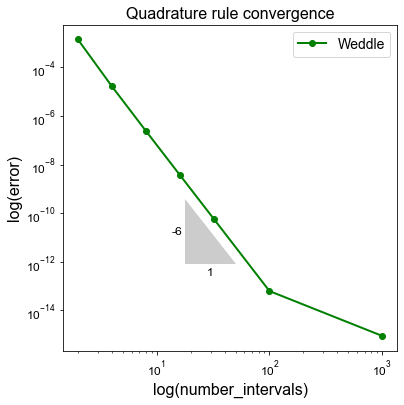

In [7]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the Weddle's rule function.
print("The exact area found by direct integration = 2")
interval_sizes_W = [2, 4, 8, 16, 32, 100, 1000]
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_W):
    area = weddles_rule(0, np.pi, f, number_intervals)
    errors_W[i] = abs(area-2)
    print('Area {0:<4d} interval(s), {1:<4d} function evaluations for Weddle = {2:.16f} (error = {3:.16e})'.format(
        number_intervals, ((number_intervals+1)+(2*number_intervals+1)), area, errors_W[i]))

# plot
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_W, errors_W, 'go-', lw=2, label='Weddle')
# need to run the other quadrature rules to allow the following 3 lines
#ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
#ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
#ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# need to run the other quadrature rules to allow the following 2 lines
#annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, size_frac=0.15, pad_frac=0.05)
#annotation.slope_marker((5e1, 5e-9), (-4, 1), invert=True, ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((5e1, 8e-13), (-6, 1), invert=True, ax=ax1, size_frac=0.15, pad_frac=0.05)

# this generates the image seen in lecture
#fig.savefig('weddle_convergence.png', dpi=600, format='png', facecolor='w', edgecolor='w')

<div class="optional">
    
## Homework - Midpoint rule error [$\star$]

In class we stated that a bound on the midpoint rule's error is given by

$$ \left| E_M^n \right| \le \frac{(b-a)^3}{24n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|. $$

And we noted that for midpoint (and all odd order Newton-Cotes rules including Simpson's rule) we gain an order of precision/accuracy over what we might expect, i.e. here this error bound indicates that the method is second-order accurate
and integrates linear polynomials exactly.

If we follow the error bound derivation we performed in lecture for the Trapezoidal rule, we would progress by
taking $N=0$ (as the midpoint rule is fitting a constant, degree zero, function) and using our Lagrange remainder result to estimate the *interpolation error* over the interval $[a,b]$ as:

$$R_0(x) = \left(x - \frac{1}{2}(a+b)\right) {f'(c_x)}.$$

Our Midpoint rule quadrature error over a single interval $[a,b]$ could then be estimated via

\begin{align*}
E_M \equiv E_0 = I - I_0 
&= \int_{a}^{b} f\left ( x \right )\, dx - \int_a^b\,P_0\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} f\left ( x \right ) - P_0\left ( x \right ) \, dx\\[5pt] 
&= \int_{a}^{b} R_0\left ( x \right )\, dx.
\end{align*}

Substitute in the above expression for $R_0(x)$ and demonstrate that this leading order term in the error expansion is indeed zero.

Once you've convinced yourself of this I suggest take a look at my derivation of the error bound in the sample solution which involves taking the next order term in the Taylor series expansion about the midpoint of an interval.

</div>

### Solution - Midpoint rule error

If we start the error bound derivation for the midpoint rule as we did for the Trapezoidal scheme then we would begin by taking $N=0$ and using our Lagrange remainder result to estimate the interpolation error over the interval $[a,b]$ as:

$$R_0(x) = \left(x - \frac{1}{2}(a+b)\right) {f'(c_x)}.$$

But we encounter a problem if we progress as for the Trapezoidal scheme and integrate this to find the quadrature error

\begin{align*}
E_M \equiv E_0 
& = \int_a^b \left(x - \frac{1}{2}(a+b)\right) {f'(c_x)} \,dx \\[5pt]
& = {f'(c_x)}  \int_a^b \left(x - \frac{1}{2}(a+b)\right) \,dx \\[5pt]
& = {f'(c_x)}  \left[\frac{1}{2}x^2 - \frac{(a+b)}{2}x \right]_a^b\\[5pt]
& = {f'(c_x)}  \left[ \frac{1}{2}b^2 - \frac{(a+b)}{2}b -  \frac{1}{2}a^2 + \frac{(a+b)}{2}a \right]\\[5pt]
& = {f'(c_x)}  \left[ \frac{1}{2}b^2 - \frac{ab}{2} - \frac{b^2}{2} -  \frac{1}{2}a^2 + \frac{a^2}{2} + \frac{ab}{2} \right]\\[5pt]
& = 0
\end{align*}

The error isn't actually zero, just the leading order term we considered based upon the Lagrange remainder, when integrated, is zero. This just tells us that the error is one order higher than we might expect (reinforcing what we saw in the lectures). Recall that we noted something similar for Simpson's rule, and it turns out to be true that we gain an extra order of accuracy with all Newton-Cotes rules based upon fitting an even degree polynomial.

So actually what we need to do to estimate the error is to consider the next term in the Taylor series expansion.

If you're feeling brave you could also attempt this using a Taylor series about the midpoint: $c:=(a+b)/2$

$$f(x) = f(c) + (x-c)f'(c) + \frac{1}{2!}(x-c)^2f''(c) + \frac{1}{3!}(x-c)^3f'''(c) + \ldots$$

and integrating the second term to show that

$$\int_{a}^{b}  \frac{1}{2!}(x-c)^2\,f''(c)  \, dx = \frac{(b-a)^3 }{24}\, f''(c).$$


We need more terms in the Taylor series expansion; for the Midpoint rule it make sense to expand the Taylor series about the midpoint: $c:=(a+b)/2$

$$f(x) = f(c) + (x-c)f'(c) + \frac{1}{2!}(x-c)^2f''(c) + \frac{1}{3!}(x-c)^3f'''(c) + \ldots$$

In which case, as the polynomial $P_0\left ( x \right )$ in this case is constant and equal to $f(c)$, we have

\begin{align*}
E_M  
&= \int_{a}^{b} f\left ( x \right )\, dx - \int_a^b\,P_0\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} f\left ( x \right ) - f(c) \, dx\\[5pt] 
&= \int_{a}^{b}  \left( (x-c)\,f'(c) + \frac{1}{2!}(x-c)^2\,f''(c) + h.o.t \right)  \, dx,
\end{align*}

now the first term we know from above integrates to zero, $h.o.t.$ refers to higher order terms we can ignore with some care, and provided the $f''$ term doesn't also integrate to zero, which we will now check.

The second order term integrates as follows:

\begin{align*}
E_M  
&\approx \int_{a}^{b}  \frac{1}{2!}(x-c)^2\,f''(c)  \, dx \\[5pt]
&= \frac{f''(c)}{2}\int_{a}^{b} (x-c)^2 \, dx \\[5pt]
&= \frac{f''(c)}{2} \left[ \frac{1}{3}(x-c)^3 \right]_a^b \\[5pt]
&= \frac{f''(c)}{6} \left[ (b-c)^3 - (a-c)^3 \right] \\[5pt]
&= \frac{f''(c)}{6} \left[ \left( \frac{1}{2}(b-a) \right)^3 - \left( \frac{1}{2}(a-b) \right)^3 \right] \\[5pt]
&= \frac{f''(c)}{48} \left[ (b-a)^3 - (a-b)^3 \right] \\[5pt]
&= \frac{f''(c)}{48} \left[ (b-a)^3 + (b-a)^3 \right] \\[5pt]
&= \frac{(b-a)^3 }{24}\, f''(c)
\end{align*}

To account for the potential contributions of the h.o.t. terms we ignored, the Lagrange remainder theorem tells us we just need to evaluate the function (derivative) at some location within the interval we are considering, i.e. we have 

$$E_M = \frac{(b-a)^3 }{24}\, f''(c_x),$$

where $c_x$ is *some* value/point within the interval.

Note that this is exactly a factor $-\frac{1}{2}$ the single interval error for the Trapezoidal rule derived in the lecture.

The composite Midpoint rule error follows just as for the Trapezoidal rule, applying above to an interval of size $\Delta x$ and summing up over $n$ intervals to yield

$$ \left| E_M^n \right| \le \frac{(b-a)^3}{24n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|. $$

<div class="optional">

## Homework - Derive Simpson's rule as quadratic fit [$\star$]

We stated in the lecture that:

Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation. We'll come back to this idea a bit later.

Take a look also at the Newton-Cotes section of the lecture where we derived the Trapezoidal rule with the choice $N=1$. We arrive at Simpson's (1/3) rule if we repeat this process with $N=2$.

Do this.

<br>
         
**Hint:** Note that following the derivation of the Trapezoidal rule from lectures you will need to evaluate integrals of the form

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

This integral is much easier to do if you introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Your integral then becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi = \ldots = \frac{h}{3}.
\end{align*}

Fill in the gaps and do the other integrals to complete the derivation.

</div>

### Solution - Derive Simpson's rule as quadratic fit

Consider the case $N=2$ where we have data at two end points of an interval $[a,b]$ as well as the midpoint $c := \left ( a+b\right )/2$. To simplify the terminology below call these three points $x_0$, $x_1$ and $x_2$, with $x_1$ the midpoint $c$.

The three Lagrange basis functions in this case are

\begin{align*}
\ell_0(x) &= \frac{(x-x_1)(x - x_2)}{(x_0-x_1)(x_0-x_2)}, \\[5pt]
\ell_1(x) &= \frac{(x-x_0)(x - x_2)}{(x_1-x_0)(x_1-x_2)}, \\[5pt]
\ell_2(x) &= \frac{(x-x_0)(x - x_1)}{(x_2-x_0)(x_2-x_1)}. 
\end{align*}

The integral of the first of these is

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

This integral is much easier to do if we introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Our integral now becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi 
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{\xi^3}{3} - h \frac{\xi^2}{2}\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} - h \frac{h^2}{2} - \frac{(-h)^3}{3} + h \frac{(-h)^2}{2}   \right] \\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} - \frac{h^3}{2} + \frac{h^3}{3} +  \frac{h^3}{2}   \right] 
\\[5pt]
& = \frac{1}{2h^2}2\frac{h^3}{3} \\[5pt]
& = \frac{h}{3}.
\end{align*}

Similarly,

\begin{align*}
A_1 &= \int_{x_0}^{x_2}\, \ell_1(x)\, dx \\[5pt]
& = \int_{x_0}^{x_2}\, \frac{(x-x_0)(x - x_2)}{(x_1 - x_0)(x_1-x_2)}  \, d\xi \\[5pt]
& = \frac{1}{(x_1-x_0)(x_1-x_2)}\int_{x_0}^{x_2}\, (\xi + h)(\xi - h) \, d\xi\\[5pt]
& = \frac{1}{(h)(-h)}\int_{-h}^{h}\, \xi^2 - h^2 \, d\xi 
\\[5pt]
& = \frac{1}{-h^2}\left[\frac{\xi^3}{3} - h^2 \xi\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{-h^2}\left[\frac{h^3}{3} - h^2 h - \frac{(-h)^3}{3} + h^2(-h) \right] \\[5pt]
& = \frac{1}{-h^2}\left[\frac{h^3}{3} - h^3 + \frac{h^3}{3} - h^3 \right] \\[5pt]
& = \frac{1}{-h^2}\frac{-4h^3}{3} \\[5pt]
& = \frac{4h}{3}.
\end{align*}

And finally

\begin{align*}
A_2 &= \int_{x_0}^{x_2}\, \ell_2(x)\, dx \\[5pt]
& = \int_{x_0}^{x_2}\, \frac{(x-x_0)(x - x_1)}{(x_2-x_0)(x_2-x_1)}  \, dx \\[5pt]
& = \frac{1}{(x_2-x_0)(x_2-x_1)}\int_{x_0}^{x_2}\, (\xi + h)\xi \,d\xi \\[5pt]
& = \frac{1}{(2h)(h)}\int_{-h}^{h}\, \xi^2 + h\xi \, d\xi
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{\xi^3}{3} + h \frac{\xi^2}{2}\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} + h \frac{h^2}{2} - \frac{(-h)^3}{3} -  h \frac{(-h)^2}{2} \right] \\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} +  \frac{h^3}{2} + \frac{h^3}{3} - \frac{h^3}{2} \right] \\[5pt]
& = \frac{1}{2h^2}\frac{2h^3}{3} \\[5pt]
& = \frac{h}{3}.
\end{align*}

Therefore,
\begin{align*}
I \approx \sum_{i=0}^{2}\, A_i \, f(x_i) 
&= A_0 f(a) + A_1 f\left( \frac{a+b}{2} \right) + A_2 f(b) \\[5pt]
&=  \frac{h}{3} \left( f(a) + 4 f\left( \frac{a+b}{2} \right) + f(b)  \right)\\[5pt]
&=  \frac{(b-a)}{6} \left( f(a) + 4 f\left( \frac{a+b}{2} \right) + f(b)  \right)
\end{align*}

which is Simpson's rule we derived in another way in the lecture.

<div class="optional">

## Homework - Open vs closed Newton-Cotes [$\star$]

Implement an open Newton-Cotes formula and use it to integrate $1/\sqrt{x}$  from 0 to 1. 

**Hint:** Check the open formulae here <https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas#Open_Newton%E2%80%93Cotes_formulas>.  My solution makes use of  Milne's rule which evaluates the function at the appropriate points within each sub-interval, and so uses more function evaluations for a given number of intervals compared to the composite version of Simpson's rule.

Compare your solution with a closed scheme such as Simpson's, e.g. by recreating a convergence plot such as that presented in the Lecture.

**Hint:**  Note that to avoid divide by zero warning you could define your integrand via something like:
`lambda x: 1./(np.maximum(1e-16,np.sqrt(x)))`
    
</div>

### Solution - Open vs closed Newton-Cotes

The integral of $1/\sqrt{x}$ is $2\sqrt{x}$:

In [8]:
import sympy
sympy.init_printing()
from IPython.display import display, Math

x = sympy.Symbol('x', real=True)

f = 1/sympy.sqrt(x)

display(Math(r'\int f(x)\,dx =')) 
display(sympy.integrate(f,x))

<IPython.core.display.Math object>

In [9]:
# So the exact definite integral over [0,1] is
print(2*np.sqrt(1) - 2*np.sqrt(0)) 

2.0


In [10]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)


# compute and store the integrals computed using Simpsons rule
N = 20
intervals = [2**i for i in range(1,N)]
areas_S = np.zeros(len(intervals))
for i, ints in enumerate(intervals):
    areas_S[i] = simpsons_composite_rule(0, np.pi/2, lambda x: 1./(np.maximum(1e-16,np.sqrt(x))), ints)
    print(ints, areas_S[i])   

2 2617993877991495.0
4 1308996938995748.5
8 654498469497875.6
16 327249234748938.9
32 163624617374470.6
64 81812308687236.55
128 40906154343619.484
256 20453077171810.992
512 10226538585906.74
1024 5113269292954.62
2048 2556634646478.571
4096 1278317323240.5457
8192 639158661621.5356
16384 319579330812.0328
32768 159789665407.28152
65536 79894832704.90709
131072 39947416353.72048
262144 19973708178.1274
524288 9986854090.331163


In [11]:
def milnes_rule(a, b, function, number_intervals=10):
    """ Our implementation of Milne's rule, 
    using 3 function evaluations within each subinterval
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_Milne = 0.0
    for i in range(number_intervals):
        this_bin_start = a + interval_size * (i)
        this_bin_1 = this_bin_start + 1.*interval_size/4.
        this_bin_2 = this_bin_start + 2.*interval_size/4.
        this_bin_3 = this_bin_start + 3.*interval_size/4.
        I_Milne += (interval_size/3) * ( 2 * function(this_bin_1) -
                                         function(this_bin_2) + 
                                         2 * function(this_bin_3))
    return I_Milne

In [12]:
# compute and store the integrals computed using Simpsons rule
N = 20
intervals = [2**i for i in range(1,N)]
areas_Milne = np.zeros(len(intervals))
for i, ints in enumerate(intervals):
    areas_Milne[i] =milnes_rule(0., 1., lambda x: 1./(np.maximum(1e-16,np.sqrt(x))), ints)
    print(ints, areas_Milne[i])   


2 1.739342016376355
4 1.8156666424532315
8 1.8696552456080366
16 1.9078322513952648
32 1.934827554363889
64 1.9539161213941882
128 1.9674137769125688
256 1.9769580606802521
512 1.983706888455231
1024 1.988479030340063
2048 1.991853444227608
4096 1.994239515170033
8192 1.995926722113802
16384 1.9971197575850272
32768 1.997963361056898
65536 1.99855987879252
131072 1.9989816805284122
262144 1.9992799393962486
524288 1.9994908402641889


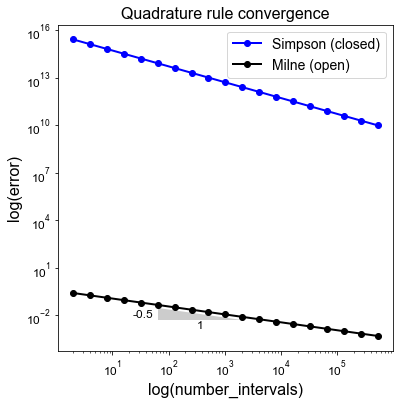

In [13]:
# plot the errors
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.loglog(intervals, np.abs(2. - areas_S), 'bo-', lw=2, label='Simpson (closed)')
ax1.loglog(intervals, np.abs(2. - areas_Milne), 'ko-', lw=2, label='Milne (open)')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# add a triangle to indicate the line slope
annotation.slope_marker((2e3, 5e-3), (-0.5, 1), invert=True, ax=ax1, size_frac=0.25, pad_frac=0.05);

# save figure to use in lecture
#fig.savefig('open_vs_closed_newton_cotes.png', dpi=600, format='png', facecolor='w', edgecolor='w')

<div class="advanced">

## Homework - Implement adaptive quadrature [$\star\star$]

Based on the algorithm description from the lecture, try to implement an adaptive quadrature algorithm and apply it to our complicated function given in the following cell.

<br>
    
**Hint:**  My function and an explanatory docstring starts

```Python
def adaptive_simpson_recursive(a, b, function, tol, S):
    """ S is a Simpson rule estimate of the integral over interval [a,b]
    This function computes S2 by splitting the current interval in half 
    and evaluating Simpson's rule over each of the two resulting sub-intervals. 
    It then evaluates an estimate of the quadrature error over the interval as 
    (S2-S)/15, and if we have not yet reached the desired error tolerance it 
    divides the current interval [a,b] in two and applies the same function to 
    each half: [a,c] and [c,b]. 
    If an error tolerance has been reached it returns the Weddle estimate for
    the integral over [a,b]: S2 + (S2 - S)/15.0.
    The function recursively sums the result from each subinterval considered. 
    `locs' is a global variable that contains all the locations we evaluate the
    function at.
    """
```

</div>

In [14]:
# a more complex example (taken from Moin which quotes the exact integral as −0.56681975015)

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

# exact solution obtained with (si.quad(f, -1, 1, epsabs=1e-16))
# NB. the "exact" value given in Moin only to 11 s.f.s: −0.56681975015
I_exact = -0.5668197501529302

### Solution - Implement adaptive quadrature

We'll implement the method using our Simpson's rule function, and write a recursive function.

Note that we can either base this on a call to the composite Simpson's rule function with two intervals, or our first Simpson's rule implementation with one interval (note that implementation evaluated the function at the midpoint, $c = (a+b)/2$).

In [15]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals, hence additional 
    information is generated through additional function evaluations. 
    
    This is different to the function/implementation available with Scipy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also that this version of the function performs redundant function evaluations -
    see the composite implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

In [16]:
def adaptive_simpson_recursive(a, b, function, tol, S):
    """ S is a Simpson rule estimate of the integral over interval [a,b]
    This function computes S2 by splitting the current interval in half 
    and evaluating Simpson's rule over each of the two resulting sub-intervals. 
    It then evaluates an estimate of the quadrature error over the interval as 
    (S2-S)/15, and if we have not yet reached the desired error tolerance it 
    divides the current interval [a,b] in two and applies the same function to 
    each half: [a,c] and [c,b]. 
    If an error tolerance has been reached it returns the Weddle estimate for
    the integral over [a,b]: S2 + (S2 - S)/15.0.
    The function recursively sums the result from each subinterval considered. 
    `locs' is a global variable that contains all the locations we evaluate the
    function at.
    """
    global locs
    # the midpoint of the current interval
    c = (a + b) / 2.0
    locs = np.append(locs, np.array(c))
    # compute S over each half of the current interval to provide S2
    Sa = simpsons_rule(a, c, function, 1)
    Sb = simpsons_rule(c, b, function, 1)
    S2 = Sa + Sb
    error = abs(S2 - S) / 15.0
    if error <= tol:
        # we have reached our error tolerance so return our best estimate of the
        # integral, in this case this is the Weddle estimate given by
        return S2 + (S2 - S)/15.0
    return adaptive_simpson_recursive(a, c, function, tol/2.0, Sa) + adaptive_simpson_recursive(c, b, function, tol/2.0, Sb)


def adaptive_simpsons_rule(a, b, function, tol):
    """Compute the integral of function from a to b to a tolerance of tol.
    `locs' is a global variable that contains all the locations we evaluate the
    function at.
    """
    global locs
    # initialise locs with points a and b as we will evaluate the function there.
    # In subsequent calls to adaptive_simpson_recursive 'locs' will be appended with the
    # midpoints of all the sub-intervals considered as the function is additionally
    # evaluated at these locations.
    locs = np.array([a, b])
    return adaptive_simpson_recursive(a, b, function, tol, simpsons_rule(a, b, function, 1)), locs

In [17]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# let's test on our example from above

I, locs = adaptive_simpsons_rule(0, np.pi, f, 1.e-4)
print('estimate of integral: {:.16f}'.format(I))
print('with function evaluations at: ', locs)

estimate of integral: 1.9999997524545721
with function evaluations at:  [0.         3.14159265 1.57079633 0.78539816 0.39269908 1.17809725
 2.35619449 1.96349541 2.74889357]


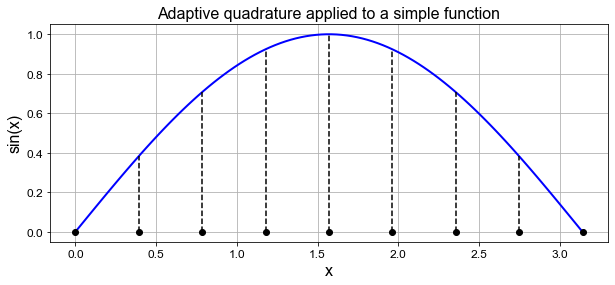

In [18]:
# plot where we evaluated function

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.set_title('Adaptive quadrature applied to a simple function', fontsize=16)

# Overlay a grid.
ax1.grid(True)


for loc in locs:
    ax1.plot([loc], [0], 'ko')
    ax1.plot([loc, loc], [0, f(loc)], 'k--')
    
#fig.savefig('adaptive_quadrature_simple_example.png', dpi=600, format='png', facecolor='w', edgecolor='w')

It's pretty clear for this example that adaptive quadrature (based on Simpson's rule) is not going to beat Simpson's rule applied on equally spaced intervals.

But the story should be different for a more complex function with some regions of rapid variation, and other with more sedate variation - let's see an example.

estimate of integral: -0.5668253232143081


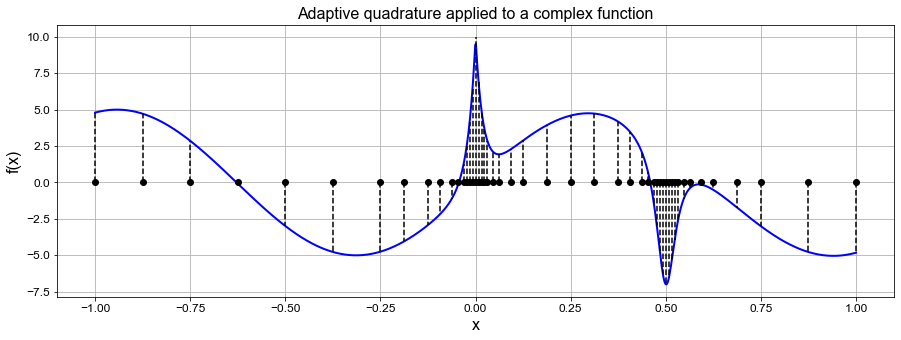

In [19]:
# a more complex example (taken from Moin which quotes the exact integral as −0.56681975015)

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

I, locs = adaptive_simpsons_rule(-1., 1., f, 1.e-3)
print('estimate of integral: {:.16f}'.format(I))

x = np.linspace(-1, 1, 1000)
y = f(x)

# plot
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('f(x)', fontsize=16)
ax1.set_title('Adaptive quadrature applied to a complex function', fontsize=16)


# Overlay a grid.
ax1.grid(True)

for loc in locs:
    ax1.plot([loc], [0], 'ko')
    ax1.plot([loc, loc], [0, f(loc)], 'k--')
    
#fig.savefig('adaptive_quadrature_example.png', dpi=600, format='png', facecolor='w', edgecolor='w')

Let's compare errors vs number of function evaluations

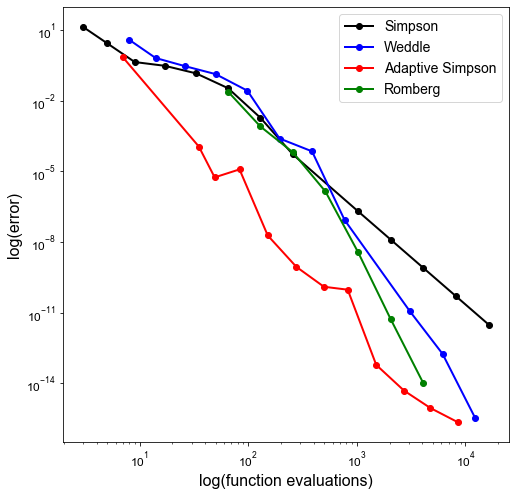

In [20]:
# exact solution obtained with (si.quad(f, -1, 1, epsabs=1e-16))
# NB. the "exact" value given in Moin only to 11 s.f.s: −0.56681975015
I_exact = -0.5668197501529302

# compute errors for composite Simpson with different numbers of intervals
interval_sizes_S = [2, 4, 8, 16, 32, 64, 128, 256, 1024, 2048, 4096, 8192, 16384]
# function evaluations
N_S = (np.array(interval_sizes_S)+1)
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    I = simpsons_composite_rule(-1., 1., f, number_intervals)
    errors_S[i] = abs(I-I_exact)


# compute errors with Weddle different numbers of intervals
interval_sizes_W = [2, 4, 8, 16, 32, 64, 128, 256, 1024, 2048, 4096]
# function evaluations
N_W = (np.array(interval_sizes_W)+1) + (2*np.array(interval_sizes_W)+1)
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_W):
    I = weddles_rule(-1., 1., f, number_intervals)
    errors_W[i] = abs(I-I_exact)


# compute errors for adaptive Simpson with different error tolerances
tols = [1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-5, 1.e-6,
        1.e-7, 1.e-8, 1e-9, 1e-10, 1e-11, 1e-12]
errors_AS = np.zeros_like(tols, dtype='float64')
N_AS = np.zeros_like(tols, dtype='int64')
for (i, tol) in enumerate(tols):
    I, locs = adaptive_simpsons_rule(-1., 1., f, tol)
    errors_AS[i] = abs(I-I_exact)
    N_AS[i] = len(locs)


# Romberg values from running the code below with different error tolerances
errors_R = np.array([0.02460476877415807, 0.0008145743266728678, 6.502735143276706e-05,
                     1.4018870156951024e-06, 3.703290563095152e-09, 5.242806189187377e-12, 9.880984919163893e-15])
N_R = np.array([65, 129, 257, 513, 1025, 2049, 4097])
# The Romberg code:
## Note we have to increase the maximum order of extrapolation by
## increasing divmax from the default value of 10, otherwise we get a warning.
#I_R = si.romberg(f, -1, 1, show=True, divmax=13, rtol=1.e-12, tol=1.e-12)
#print('\nError = {:.16f}'.format(np.abs(I_R - I_exact)))

# plot
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.loglog(N_S, errors_S, 'ko-', lw=2, label='Simpson')
ax1.loglog(N_W, errors_W, 'bo-', lw=2, label='Weddle')
ax1.loglog(N_AS, errors_AS, 'ro-', lw=2, label='Adaptive Simpson')
ax1.loglog(N_R, errors_R, 'go-', lw=2, label='Romberg')
ax1.set_xlabel('log(function evaluations)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.legend(loc='best', fontsize=14)

#fig.savefig('compare_quad_methods_complex_function.png', dpi=600, format='png', facecolor='w', edgecolor='w')

Let's see how Romberg integration gets on with this complex example (NB. we don't expect it to do that well given Weddle wasn't obviously better than Simpson's rule).

In [21]:
# Note we have to increase the maximum order of extrapolation by
# increasing divmax from the default value of 10, otherwise we get a warning.
I_R = si.romberg(f, -1, 1, show=True, divmax=13, rtol=1.e-12, tol=1.e-12)
print('\nError = {:.16f}'.format(np.abs(I_R - I_exact)))

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000029A3BE53CA8> from [-1, 1]

 Steps  StepSize   Results
     1  2.000000 -0.044283 
     2  1.000000  9.938018 13.265451 
     4  0.500000 -0.035986 -3.360654 -4.469061 
     8  0.250000 -0.102750 -0.125005  0.090705  0.163082 
    16  0.125000 -0.221047 -0.260479 -0.269511 -0.275229 -0.276948 
    32  0.062500 -0.370618 -0.420474 -0.431141 -0.433706 -0.434328 -0.434482 
    64  0.031250 -0.492005 -0.532467 -0.539933 -0.541660 -0.542083 -0.542189 -0.542215 
   128  0.015625 -0.546681 -0.564907 -0.567070 -0.567500 -0.567602 -0.567627 -0.567633 -0.567634 
   256  0.007812 -0.561746 -0.566767 -0.566891 -0.566888 -0.566886 -0.566885 -0.566885 -0.566885 -0.566885 
   512  0.003906 -0.565549 -0.566817 -0.566820 -0.566819 -0.566818 -0.566818 -0.566818 -0.566818 -0.566818 -0.566818 
  1024  0.001953 -0.566502 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 -0.566820 
  2048  0.000977 -0

<div class="advanced">
    
## Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]

Implement a "composite" version of Gauss-Legendre, i.e. split up the total interval into sub-intervals, apply Gauss-Legendre on each subinterval and sum.

Compare this method, for differing degrees, against the composite Simpson rule for our $\sin$ and more complex function we considered in lecture.

</div>

### Solution - Implement a "composite" version of Gauss-Legendre quadrature

In [22]:
# code from the lecture
def gauss_legendre(a, b, function, degree=5):
    """Function to evaluate Gauss Legendre quadrature
    """
    # compute the Gauss-Legendre nodes and weights
    xi, w = np.polynomial.legendre.leggauss(degree)

    # Translate the node locations from the interval [-1, 1] to [a, b]
    x =  0.5*(b + a) + 0.5 * (b - a) * xi
 
    return 0.5*(b - a) * sum(w * f(x))

# and a new function which calls above over each subinterval
def composite_gauss_legendre(a, b, function, degree=2, number_intervals=10):
    """ A composite version of Gauss-Legendre
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_cgl = 0.0
    for i in range(number_intervals):
        this_bin_start = a + interval_size * (i)
        this_bin_end = a + interval_size * (i+1)
        I_cgl_this_interval = gauss_legendre(this_bin_start, this_bin_end, function, degree)
        I_cgl += I_cgl_this_interval
    return I_cgl

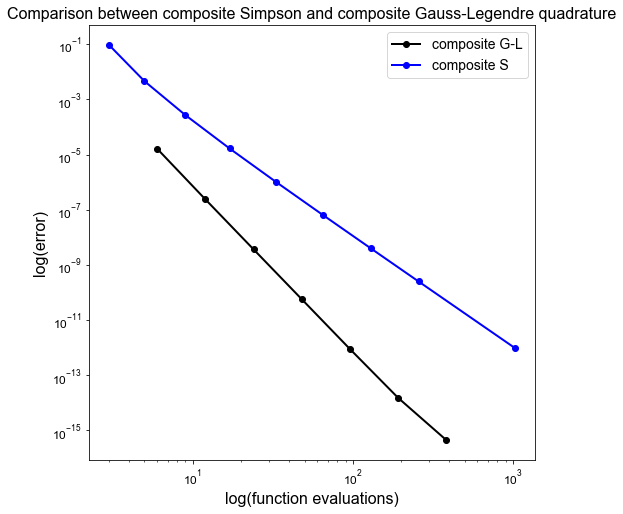

In [23]:
# test on the simple function from class

# you should play around with "degree" to see what happens
# you also need to make sure you get the formula for the number
# of function evaluations (in N_cgl below) correct otherwise it
# will be an unfair comparison

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# compute errors for composite Gauss-Legendre with different numbers of intervals
degree = 3
interval_sizes_cgl = [2, 4, 8, 16, 32, 64, 128]
# function evaluations
N_cgl = (np.array(interval_sizes_cgl))*degree # number of func evals = degree per interval
errors_cgl = np.zeros_like(interval_sizes_cgl, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_cgl):
    I = composite_gauss_legendre(0, np.pi, f, degree, number_intervals)
    errors_cgl[i] = abs(I-2.)

# compute errors for composite Simpson with different numbers of intervals
interval_sizes_S = [2, 4, 8, 16, 32, 64, 128, 256, 1024]
# function evaluations
N_S = (np.array(interval_sizes_S)+1)
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    I = simpsons_composite_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(I-2.)
    
# plot
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.loglog(N_cgl, errors_cgl, 'ko-', lw=2, label='composite G-L')
ax1.loglog(N_S, errors_S, 'bo-', lw=2, label='composite S')
ax1.set_xlabel('log(function evaluations)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Comparison between composite Simpson and composite Gauss-Legendre quadrature', fontsize=16)
ax1.legend(loc='best', fontsize=14)

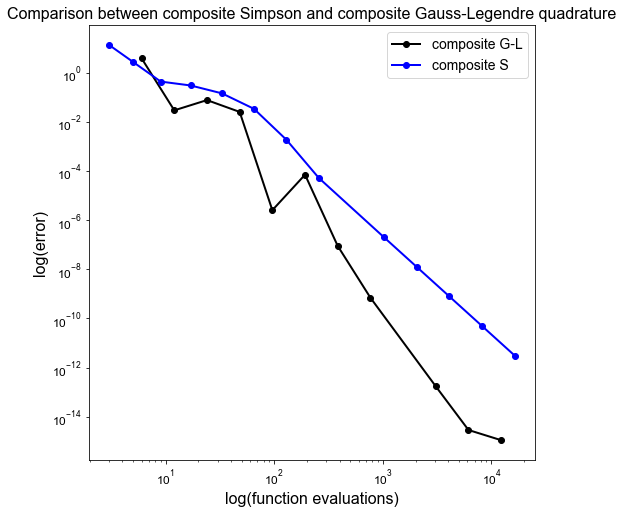

In [24]:
# repeat for our more complex function

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

# exact solution obtained with (si.quad(f, -1, 1, epsabs=1e-16))
# NB. the "exact" value given in Moin only to 11 s.f.s: −0.56681975015
I_exact = -0.5668197501529302

# compute errors for composite Gauss-Legendre with different numbers of intervals
degree = 3
interval_sizes_cgl = [2, 4, 8, 16, 32, 64, 128, 256, 1024, 2048, 4096]
# function evaluations
N_cgl = (np.array(interval_sizes_cgl))*degree # number of func evals = degree per interval
errors_cgl = np.zeros_like(interval_sizes_cgl, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_cgl):
    I = composite_gauss_legendre(-1., 1., f, degree, number_intervals)
    errors_cgl[i] = abs(I-I_exact)

# compute errors for composite Simpson with different numbers of intervals
interval_sizes_S = [2, 4, 8, 16, 32, 64, 128, 256, 1024, 2048, 4096, 8192, 16384]
# function evaluations
N_S = (np.array(interval_sizes_S)+1)
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    I = simpsons_composite_rule(-1., 1., f, number_intervals)
    errors_S[i] = abs(I-I_exact)
    
# plot
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.loglog(N_cgl, errors_cgl, 'ko-', lw=2, label='composite G-L')
ax1.loglog(N_S, errors_S, 'bo-', lw=2, label='composite S')
ax1.set_xlabel('log(function evaluations)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Comparison between composite Simpson and composite Gauss-Legendre quadrature', fontsize=16)
ax1.legend(loc='best', fontsize=14)